In [15]:
import pandas as pd
from sklearn import decomposition, preprocessing
import matplotlib.pyplot as plt
import math
import numpy as np

In [12]:
df_my_cours = pd.read_csv("data/my_courses.csv").set_index('titreCours')[["inscription","progression","duree","difficulte","nbChapitres","nbEvaluations"]]

In [13]:
df_my_cours = (df_my_cours-df_my_cours.mean())/df_my_cours.std()

In [18]:
X_skaled = preprocessing.StandardScaler().fit_transform(df_my_cours.values)
pca = decomposition.PCA(n_components=6)
X_projected = pca.fit_transform(X_skaled)
df_proj = pd.DataFrame(X_projected, index=df_my_cours.index, columns=["F"+str(i+1) for i in range(6)])/ math.sqrt(len(df_my_cours.columns))

In [19]:
df_merg = pd.concat([df_proj.iloc[:,:2], df_my_cours], axis=1)

In [20]:
collu = ['inscription', 'progression', 'duree', 'difficulte', 'nbChapitres', 'nbEvaluations']

In [22]:
corrcoef = np.zeros((2, 6))
for i in range(len(corrcoef)):
    for r in range(len(corrcoef[0])):
        corrcoef[i][r] = df_proj.iloc[:,i].corr(df_my_cours.iloc[:,r])

<function matplotlib.pyplot.show(close=None, block=None)>

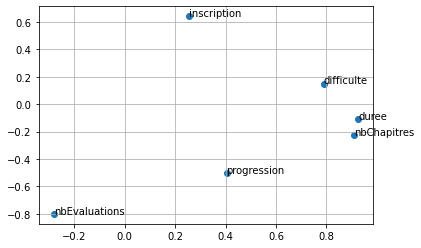

In [23]:
plt.scatter(corrcoef[0], corrcoef[1])
for i, label in enumerate(collu):
    plt.text(corrcoef[0][i], corrcoef[1][i], label)
plt.grid(which='major')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

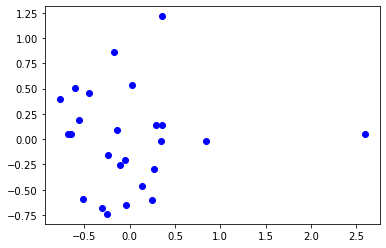

In [24]:
plt.plot(df_proj['F1'],df_proj['F2'], 'bo')
plt.show